In [1]:
# from IPython.display import HTML
# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# The raw code for this IPython notebook is by default hidden for easier reading.
# To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-pastel')

In [3]:
df = pd.read_csv("ign.csv")
df = df.drop(df.columns[0],axis = 1)
df = df.drop(df.columns[2],axis = 1)
df = df.drop(columns = ["release_month","release_day",'editors_choice','score_phrase'])
df.head()

,title,platform,score,genre,release_year
0,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,2012
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,2012
2,Splice: Tree of Life,iPad,8.5,Puzzle,2012
3,NHL 13,Xbox 360,8.5,Sports,2012
4,NHL 13,PlayStation 3,8.5,Sports,2012


title           18625
platform        18625
score           18625
genre           18589
release_year    18625
dtype: int64

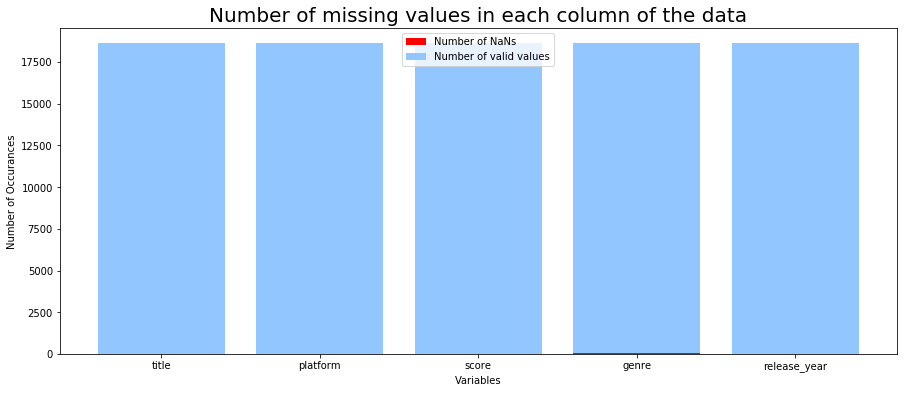

In [4]:
y_pos = np.arange(df.shape[1])
x_ticks = df.columns.to_list()
plt.figure(figsize=(15,6))
plt.tight_layout()
plt.bar(y_pos,len(df) - df.count(),align='center',alpha = 1, color = 'red', label = 'Number of NaNs')
plt.bar(y_pos,df.count(),bottom = len(df) - df.count(), align='center',alpha = 1, label = 'Number of valid values')
plt.xticks(y_pos,x_ticks)
plt.legend(loc = 'upper center')
plt.title("Number of missing values in each column of the data", fontsize = 20)
plt.ylabel("Number of Occurances")
plt.xlabel("Variables")

df.count()

In [5]:
remove_indexes = []
for index, row in df.iterrows():
    if pd.isna(row['genre']):
        remove_indexes.append(index)
df = df.drop(remove_indexes)
df.count()

title           18589
platform        18589
score           18589
genre           18589
release_year    18589
dtype: int64

In [6]:
drop = []
for index, row in df.iterrows():
    if "Wrestling" in row['genre'] or "Other" in row['genre'] or "Compilation" in row['genre'] \
    or "Productivity" in row['genre'] or "Virtual Pet" in row['genre'] or "Trivia" in row['genre']\
    or "Pinball" in row['genre'] or "Casino" in row['genre'] or "Adult" in row['genre'] or "Baseball" in row['genre']\
    or "Battle" in row['genre'] or "Hardware" in row['genre']:
        drop.append(index)
df = df.drop(drop)
drop = []
for index in df['genre'].value_counts().index.tolist():
    if df['genre'].value_counts()[index] < 10:
        drop.append(index)
# # remove all those in drop
remove_indexes = []
for index, row in df.iterrows():
    if (row['genre'] in drop):
        remove_indexes.append(index)
df = df.drop(remove_indexes)
for index, row in df.iterrows():
    if row['genre'] == "Flight" or row['genre'] == "Flight, Simulation" or row['genre'] == "Flight, Action":
            df.at[index,'genre'] = 'Simulation'
            
print(df['genre'].value_counts())
print(len(df))


Action                 3797
Sports                 1916
Shooter                1610
Racing                 1228
Adventure              1175
Strategy               1071
RPG                     980
Platformer              823
Puzzle                  776
Action, Adventure       765
Simulation              753
Fighting                547
Music                   371
Action, RPG             330
Racing, Action          210
Puzzle, Action          200
Sports, Action          196
Party                   141
Board                   116
Hunting                 112
Card                    108
Strategy, RPG            77
Fighting, Action         77
Puzzle, Adventure        47
Sports, Simulation       44
Music, Action            39
Action, Simulation       32
Educational, Puzzle      25
Racing, Simulation       25
Shooter, RPG             22
Educational              20
Educational, Action      11
Platformer, Action       11
Name: genre, dtype: int64
17655


In [7]:
for index, row in df.iterrows():
    genres = row['genre'].split(",")
    if len(genres) >= 2:
        new_row = row.copy()
        df.at[index,'genre'] = genres[0].strip()
        new_row['genre'] = genres[1].strip()
        df = df.append(new_row)

In [8]:
df['platform'].value_counts()
# transform all play station to play station
for index, row in df.iterrows():
    if (row['platform'] == "Game Boy Advance" or row['platform'] == "Game Boy Color" or row['platform'] == "Game Boy"):
        df.at[index,'platform'] = 'Game Boy (C/A)'
    if (row['platform'] == "PlayStation 2" or row['platform'] == "PlayStation 3" or row['platform'] == "PlayStation 4"or row['platform'] == "PlayStation"):
        df.at[index,'platform'] = 'PlayStation (1-4)'
    if (row['platform'] == "Nintendo DS" or row['platform'] == "Nintendo DSi" or row['platform'] == "Nintendo 3DS"or row['platform'] == "New Nintendo 3DS"):
        df.at[index,'platform'] = 'DS/3DS/DSi'
    if row['platform'] == "Xbox 360" or row['platform'] == "Xbox One" or row['platform'] == "Xbox":
        df.at[index,'platform'] = 'Xbox (360,One)'
    if row['platform'] == "Wireless" or row['platform'] == "iPod" or row['platform'] == "Android" or row['platform'] == "Windows Phone" or row['platform'] == "iPhone":
        df.at[index,'platform'] = 'Mobile'
    if row['platform'] == "Wii U" or row['platform'] == "Wii":
        df.at[index,'platform'] = 'Wii (U)'
    if row['platform'] == "PlayStation Portable" or row['platform'] == "PlayStation Vita":
        df.at[index,'platform'] = 'PSP/Vita'

drop = []
for index in df['platform'].value_counts().index.tolist():
    if (df['platform'].value_counts()[index]) < 100:
        drop.append(index)
print(drop)
# remove all those in drop
remove_indexes = []
for index, row in df.iterrows():
    if (row['platform'] in drop):
        remove_indexes.append(index)
df = df.drop(remove_indexes)
df['platform'].value_counts()

['Macintosh', 'Lynx', 'Genesis', 'NES', 'TurboGrafx-16', 'Super NES', 'N-Gage', 'NeoGeo Pocket Color', 'Sega 32X', 'Arcade', 'Master System', 'Linux', 'NeoGeo', 'Saturn', 'Commodore 64/128', 'Atari 2600', 'Nintendo 64DD', 'Game.Com', 'WonderSwan', 'TurboGrafx-CD', 'Vectrex', 'Atari 5200', 'Web Games', 'Sega CD', 'Windows Surface', 'Ouya', 'WonderSwan Color', 'SteamOS', 'Dreamcast VMU', 'Pocket PC', 'DVD / HD Video Game']


PlayStation (1-4)    4599
PC                   3611
Xbox (360,One)       2930
Mobile               1839
Wii (U)              1548
DS/3DS/DSi           1535
Game Boy (C/A)       1040
PSP/Vita              850
GameCube              583
Nintendo 64           304
Dreamcast             297
iPad                  102
Name: platform, dtype: int64

In [9]:
df.score = pd.cut(df.score, [0, 1, 2, 3, 4,5,6,7,8,9,10])
df['score'].value_counts()
df.to_csv("pre_processed.csv")

In [10]:
df = pd.read_csv("pre_processed.csv")
df = pd.concat([df,pd.get_dummies(df['platform'])],axis = 1)
df = pd.concat([df,pd.get_dummies(df['genre'])],axis = 1)
df.to_csv("processed.csv")
df.head()

,Unnamed: 0,title,platform,score,genre,release_year,DS/3DS/DSi,Dreamcast,Game Boy (C/A),GameCube,...,Music,Party,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
0,0,LittleBigPlanet PS Vita,PSP/Vita,"(8, 9]",Platformer,2012,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PSP/Vita,"(8, 9]",Platformer,2012,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,Splice: Tree of Life,iPad,"(8, 9]",Puzzle,2012,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,NHL 13,"Xbox (360,One)","(8, 9]",Sports,2012,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,NHL 13,PlayStation (1-4),"(8, 9]",Sports,2012,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
df = pd.read_csv("processed.csv")
df['title'].value_counts()

Open Season                                                       19
LEGO Star Wars II: The Original Trilogy                           18
Cars                                                              18
Brain Challenge                                                   16
Marvel: Ultimate Alliance                                         15
WALL-E                                                            15
LEGO Batman: The Videogame                                        14
LEGO Star Wars III: The Clone Wars                                14
Tomb Raider: Legend                                               14
LEGO Harry Potter: Years 1-4                                      14
LEGO Indiana Jones: The Original Adventures                       14
Avatar: The Last Airbender                                        14
The Chronicles of Narnia: The Lion, The Witch and The Wardrobe    14
Spider-Man 3                                                      14
The Chronicles of Narnia: Prince C

In [12]:
df= df.groupby(['title'],as_index = False).max()
# df['title'].value_counts()
# df.head()
df.to_csv("games.csv")

In [13]:
df = pd.read_csv("games.csv")
df= df.groupby(['release_year'],as_index = False).sum()
df.to_csv("games_2.csv")
